**1. Initialize Spark Session**

In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=997048fde7af180bcfad48a8463b10b9b450f408fe0cb6ae0b54d7537b9a649d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession


In [3]:
spark = SparkSession.builder.appName("CarSalesAnnualPricePrediction").getOrCreate()

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/BigData/Car Sales.xlsx - car_data.csv"

**2. Read Data into Spark DataFrame**

In [9]:
data = spark.read.csv(path, header=True, inferSchema=True)

In [10]:
data.show()

+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|      Car_id|    Date|Customer Name|Gender|Annual Income|         Dealer_Name|   Company|        Model|              Engine|Transmission|     Color|Price ($)|Dealer_No |Body Style|  Phone|Dealer_Region|
+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|C_CND_000001|1/2/2022|    Geraldine|  Male|        13500|Buddy Storbeck's ...|      Ford|   Expedition|DoubleÂ Overhead ...|        Auto|     Black|    26000|06457-3834|       SUV|8264678|   Middletown|
|C_CND_000002|1/2/2022|          Gia|  Male|      1480000|    C & M Motors Inc|     Dodge|      Durango|DoubleÂ Overhead ...|        Auto|     Black|    19000|60504-7114|       SUV|684

In [11]:
data.printSchema()


root
 |-- Car_id: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Annual Income: integer (nullable = true)
 |-- Dealer_Name: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Price ($): integer (nullable = true)
 |-- Dealer_No : string (nullable = true)
 |-- Body Style: string (nullable = true)
 |-- Phone: integer (nullable = true)
 |-- Dealer_Region: string (nullable = true)



In [12]:
data.select('Model','Annual Income').show(10)


+----------+-------------+
|     Model|Annual Income|
+----------+-------------+
|Expedition|        13500|
|   Durango|      1480000|
|  Eldorado|      1035000|
|    Celica|        13500|
|        TL|      1465000|
|  Diamante|       850000|
|   Corolla|      1600000|
|    Galant|        13500|
|    Malibu|       815000|
|    Escort|        13500|
+----------+-------------+
only showing top 10 rows



In [13]:
data.filter(data['Annual Income']>=13500).show()


+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|      Car_id|    Date|Customer Name|Gender|Annual Income|         Dealer_Name|   Company|        Model|              Engine|Transmission|     Color|Price ($)|Dealer_No |Body Style|  Phone|Dealer_Region|
+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|C_CND_000001|1/2/2022|    Geraldine|  Male|        13500|Buddy Storbeck's ...|      Ford|   Expedition|DoubleÂ Overhead ...|        Auto|     Black|    26000|06457-3834|       SUV|8264678|   Middletown|
|C_CND_000002|1/2/2022|          Gia|  Male|      1480000|    C & M Motors Inc|     Dodge|      Durango|DoubleÂ Overhead ...|        Auto|     Black|    19000|60504-7114|       SUV|684

In [14]:
data.groupBy("Model").count().show()

+-------------+-----+
|        Model|count|
+-------------+-----+
|       Cirrus|   37|
|      Contour|  113|
|     Villager|  151|
|        RX300|   15|
|           SC|  148|
|      Cutlass|  194|
|        Camry|  156|
|           SL|   44|
|      Seville|   87|
|    Ram Wagon|  103|
|      Outback|  150|
|         300M|  243|
|Grand Marquis|  261|
|           A6|  329|
|         Golf|  124|
|     Forester|  255|
|       Sentra|   44|
|     Cherokee|   74|
|          SLK|  212|
|        Focus|  146|
+-------------+-----+
only showing top 20 rows



In [15]:
data.groupBy("Annual Income").count().show()

+-------------+-----+
|Annual Income|count|
+-------------+-----+
|      1078000|    1|
|       499000|    4|
|      1263500|    1|
|       702000|   12|
|       586500|    1|
|       745500|    3|
|       419000|    2|
|      1662500|    1|
|       488000|    6|
|      1265500|    1|
|       441000|    5|
|       450000|   66|
|       552000|    6|
|       870000|   54|
|      2365000|    3|
|       809000|    1|
|      1205000|   23|
|      2228000|    1|
|       733500|    1|
|      1022000|    3|
+-------------+-----+
only showing top 20 rows



In [16]:
data.createOrReplaceTempView("carSales")

In [17]:
sqlDFS = spark.sql("SELECT `Car_id`, Date, `Customer Name`, Gender, `Annual Income`, `Dealer_Name`, Company, Model, Engine, Transmission, Color, `Price ($)`, `Dealer_No `, `Body Style`, Phone, `Dealer_Region`FROM carSales WHERE `Annual Income` > 12499")

In [18]:
sqlDFS.show()

+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|      Car_id|    Date|Customer Name|Gender|Annual Income|         Dealer_Name|   Company|        Model|              Engine|Transmission|     Color|Price ($)|Dealer_No |Body Style|  Phone|Dealer_Region|
+------------+--------+-------------+------+-------------+--------------------+----------+-------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|C_CND_000001|1/2/2022|    Geraldine|  Male|        13500|Buddy Storbeck's ...|      Ford|   Expedition|DoubleÂ Overhead ...|        Auto|     Black|    26000|06457-3834|       SUV|8264678|   Middletown|
|C_CND_000002|1/2/2022|          Gia|  Male|      1480000|    C & M Motors Inc|     Dodge|      Durango|DoubleÂ Overhead ...|        Auto|     Black|    19000|60504-7114|       SUV|684

**3. Data Exploration and Cleaning**

In [19]:
from pyspark.sql.functions import col, count, when

# Checking for missing values in each column
missing_values = data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns])
missing_values.show()

# Dropping duplicates
data = data.dropDuplicates()

# Dropping rows with missing values
data = data.na.drop()

# Show the DataFrame after cleaning
data.show()

+------+----+-------------+------+-------------+-----------+-------+-----+------+------------+-----+---------+----------+----------+-----+-------------+
|Car_id|Date|Customer Name|Gender|Annual Income|Dealer_Name|Company|Model|Engine|Transmission|Color|Price ($)|Dealer_No |Body Style|Phone|Dealer_Region|
+------+----+-------------+------+-------------+-----------+-------+-----+------+------------+-----+---------+----------+----------+-----+-------------+
|     0|   0|            0|     0|            0|          0|      0|    0|     0|           0|    0|        0|         0|         0|    0|            0|
+------+----+-------------+------+-------------+-----------+-------+-----+------+------------+-----+---------+----------+----------+-----+-------------+

+------------+---------+-------------+------+-------------+--------------------+----------+--------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|      Car_id|     Date|Cust

In [20]:
data.select(('Company')).distinct().show()

+----------+
|   Company|
+----------+
|Volkswagen|
|Oldsmobile|
|  Infiniti|
|     Lexus|
|    Jaguar|
|    Saturn|
|      Jeep|
|Mitsubishi|
| Chevrolet|
|     Volvo|
|   Hyundai|
|      Saab|
|     Honda|
|      Audi|
|  Cadillac|
|  Plymouth|
|   Pontiac|
|   Mercury|
|  Chrysler|
|   Lincoln|
+----------+
only showing top 20 rows



In [21]:
data.select(("Body Style")).distinct().show()

+----------+
|Body Style|
+----------+
|   Hardtop|
| Hatchback|
|       SUV|
|     Sedan|
| Passenger|
+----------+



In [22]:
from pyspark.sql.functions import col

data

DataFrame[Car_id: string, Date: string, Customer Name: string, Gender: string, Annual Income: int, Dealer_Name: string, Company: string, Model: string, Engine: string, Transmission: string, Color: string, Price ($): int, Dealer_No : string, Body Style: string, Phone: int, Dealer_Region: string]

**4. Read Data into Spark DataFrame**

In [23]:
data = data.withColumnRenamed('Body Style', 'Body_Style')

In [24]:
data.show()


+------------+---------+-------------+------+-------------+--------------------+----------+--------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|      Car_id|     Date|Customer Name|Gender|Annual Income|         Dealer_Name|   Company|         Model|              Engine|Transmission|     Color|Price ($)|Dealer_No |Body_Style|  Phone|Dealer_Region|
+------------+---------+-------------+------+-------------+--------------------+----------+--------------+--------------------+------------+----------+---------+----------+----------+-------+-------------+
|C_CND_000040| 1/3/2022|        Harry|Female|        13500|Star Enterprises Inc|    Nissan|        Sentra|DoubleÂ Overhead ...|        Auto|     Black|    16000|99301-3882| Passenger|7213857|        Pasco|
|C_CND_000334| 2/3/2022|      Camille|  Male|      1660000|Gartner Buick Hyu...|   Mercury|      Villager|   Overhead Camshaft|      Manual|Pale White|    14000|38701-8047| Pas

**5. Data Aggregation and Analysis**

In [25]:
data = data.drop("Color", "Engine")


In [26]:
data.show()


+------------+---------+-------------+------+-------------+--------------------+----------+--------------+------------+---------+----------+----------+-------+-------------+
|      Car_id|     Date|Customer Name|Gender|Annual Income|         Dealer_Name|   Company|         Model|Transmission|Price ($)|Dealer_No |Body_Style|  Phone|Dealer_Region|
+------------+---------+-------------+------+-------------+--------------------+----------+--------------+------------+---------+----------+----------+-------+-------------+
|C_CND_000040| 1/3/2022|        Harry|Female|        13500|Star Enterprises Inc|    Nissan|        Sentra|        Auto|    16000|99301-3882| Passenger|7213857|        Pasco|
|C_CND_000334| 2/3/2022|      Camille|  Male|      1660000|Gartner Buick Hyu...|   Mercury|      Villager|      Manual|    14000|38701-8047| Passenger|6395931|   Greenville|
|C_CND_000593|2/25/2022|      Pinchas|  Male|        13500|Ryder Truck Renta...|   Pontiac|      Grand Am|        Auto|    12000|0

In [27]:
data.sort("Price ($)", ascending=True).collect()


[Row(Car_id='C_CND_013947', Date='5/23/2023', Customer Name='Sajid', Gender='Female', Annual Income=13500, Dealer_Name='Gartner Buick Hyundai Saab', Company='Ford', Model='Taurus', Transmission='Auto', Price ($)=1200, Dealer_No ='38701-8047', Body_Style='SUV', Phone=7828930, Dealer_Region='Greenville'),
 Row(Car_id='C_CND_013997', Date='5/25/2023', Customer Name='Amelia', Gender='Male', Annual Income=1955000, Dealer_Name='Rabun Used Car Sales', Company='Mercedes-B', Model='S-Class', Transmission='Auto', Price ($)=1450, Dealer_No ='85257-3102', Body_Style='SUV', Phone=8719322, Dealer_Region='Scottsdale'),
 Row(Car_id='C_CND_014011', Date='5/26/2023', Customer Name='Fatima', Gender='Male', Annual Income=13500, Dealer_Name='Ryder Truck Rental and Leasing', Company='Lincoln', Model='Town car', Transmission='Manual', Price ($)=1700, Dealer_No ='06457-3834', Body_Style='Hatchback', Phone=7469239, Dealer_Region='Middletown'),
 Row(Car_id='C_CND_014021', Date='5/26/2023', Customer Name='Oweis'

**5. Data Aggregation and Analysis**

In [28]:
from pyspark.sql.functions import desc
# collected data to Pandas DataFrame for easier plotting
import pandas as pd
# Visualization using matplotlib
import matplotlib.pyplot as plt

# Top 10 Car Company
top10_company = data.groupBy("Company").count().orderBy(desc("count")).limit(10)
top10_company.show()

# Car Transmission Distribution
transmission = data.groupBy("Transmission").count().orderBy(desc("count"))
transmission.show()

# Collect data to the driver for visualization
top10_company_data = top10_company.collect()
transmission_data = transmission.collect()

+----------+-----+
|   Company|count|
+----------+-----+
| Chevrolet| 1819|
|     Dodge| 1671|
|      Ford| 1614|
|Volkswagen| 1333|
|Mercedes-B| 1285|
|Mitsubishi| 1277|
|  Chrysler| 1120|
|Oldsmobile| 1111|
|    Toyota| 1110|
|    Nissan|  886|
+----------+-----+

+------------+-----+
|Transmission|count|
+------------+-----+
|        Auto|12571|
|      Manual|11335|
+------------+-----+



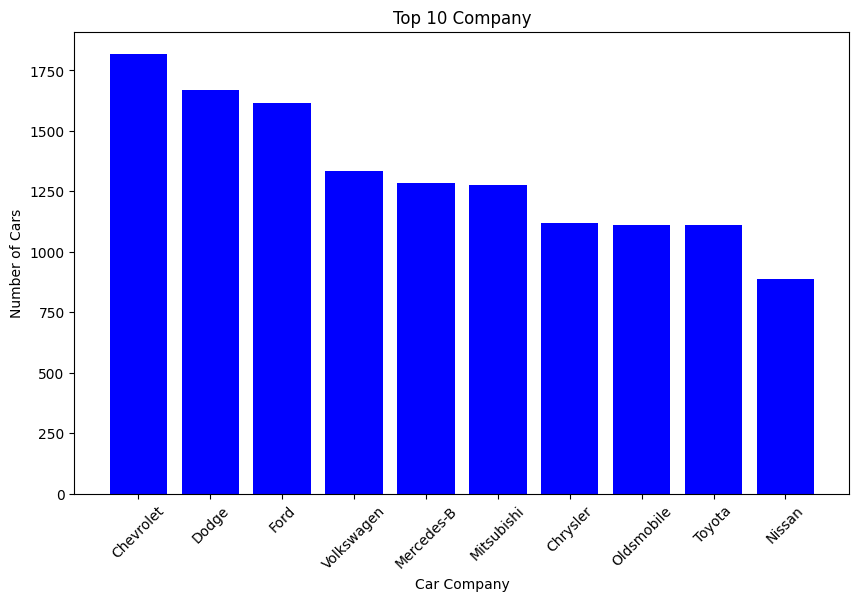

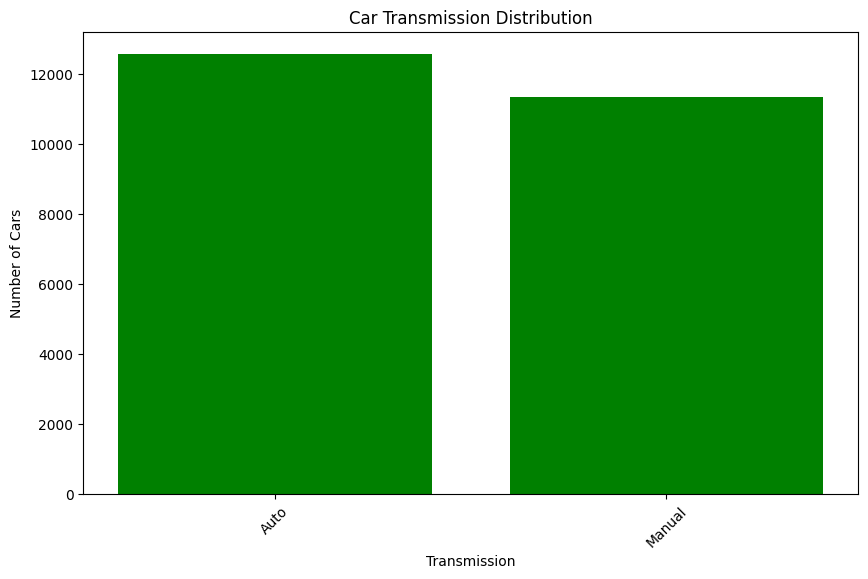

In [29]:
import pandas as pd

# Create DataFrame
top10_company_dat = pd.DataFrame(top10_company_data, columns=["Company", "count"])

transmission_dis = pd.DataFrame(transmission_data, columns=["Transmission", "count"])


# Plot Top 10 Company
plt.figure(figsize=(10, 6))
plt.bar(top10_company_dat["Company"], top10_company_dat["count"], color='blue')
plt.xlabel('Car Company')
plt.ylabel('Number of Cars')
plt.title('Top 10 Company')
plt.xticks(rotation=45)
plt.show()

# Plot Car Transmission Distribution
plt.figure(figsize=(10, 6))
plt.bar(transmission_dis["Transmission"], transmission_dis["count"], color='green')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.title('Car Transmission Distribution')
plt.xticks(rotation=45)
plt.show()